## LAB1 Xinyi Li 21147426

### A. Importing Modules and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./bank.csv')

### B. Quick Data Exploration

In [4]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


##### B.1. Quick Examination of Numerical Attributes

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


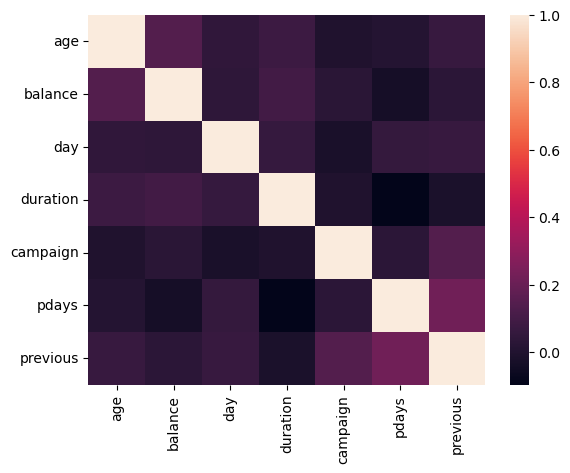

In [7]:
sns.heatmap(df.corr());

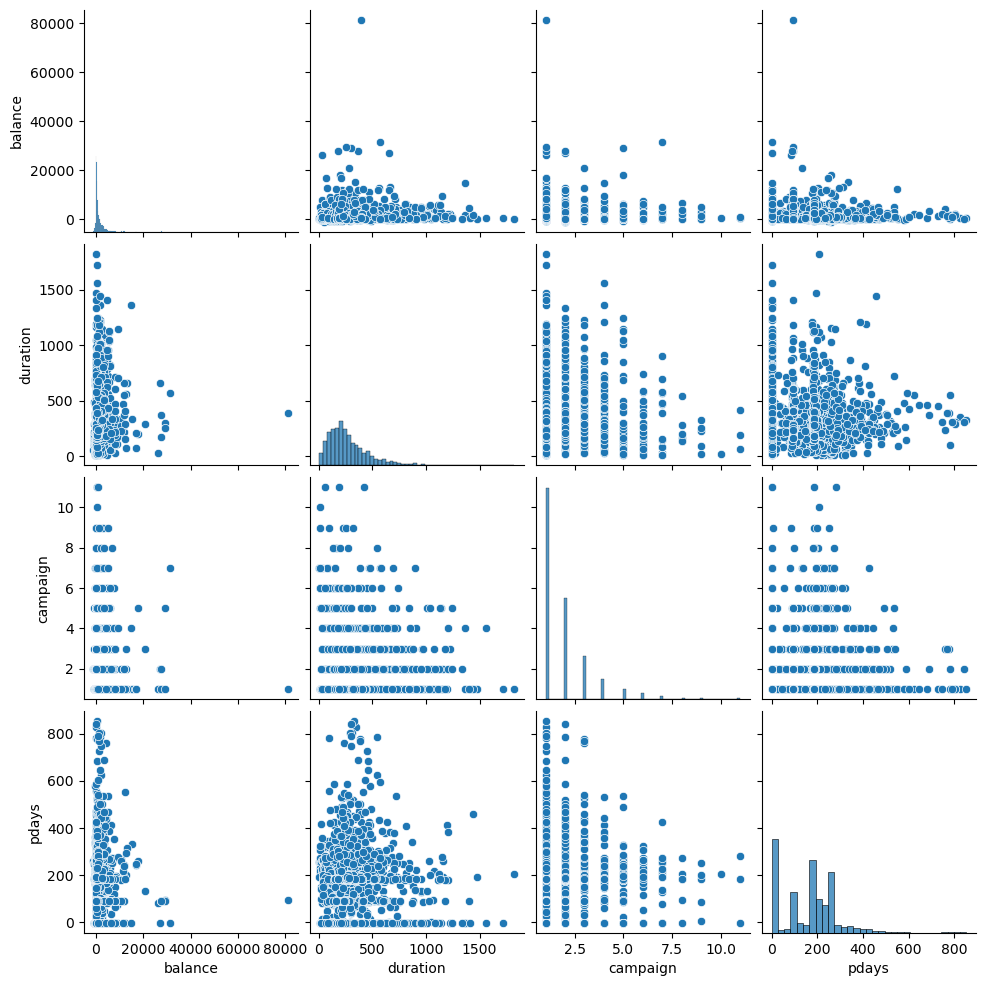

In [8]:
sns.pairplot(data=df[['balance','duration','campaign','pdays']].dropna())
plt.show()

##### B.2. Quick Examination of Categorical Attributes

In [9]:
df['housing'].value_counts()
#df['housing'].count()

no     1037
yes     963
Name: housing, dtype: int64

In [10]:
df['loan'].value_counts()
#df['loan'].count()

no     1750
yes     250
Name: loan, dtype: int64

In [11]:
df['subscribed'].value_counts()
#df['subscribed'].count()

no     1000
yes    1000
Name: subscribed, dtype: int64

### C. Distribution Analysis for Numerical Atributes

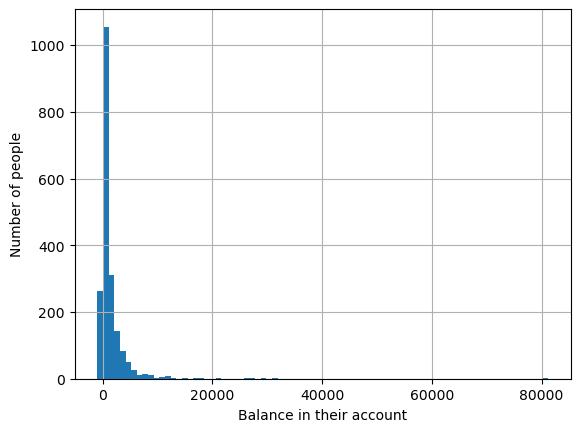

In [12]:
df['balance'].hist(bins=80)
plt.xlabel('Balance in their account')
plt.ylabel('Number of people')
plt.show()

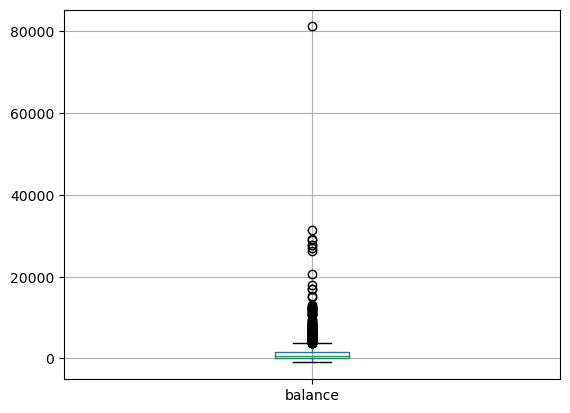

In [13]:
df.boxplot(column='balance')
plt.show()

We can use the representation method of the box plot to see intuitively

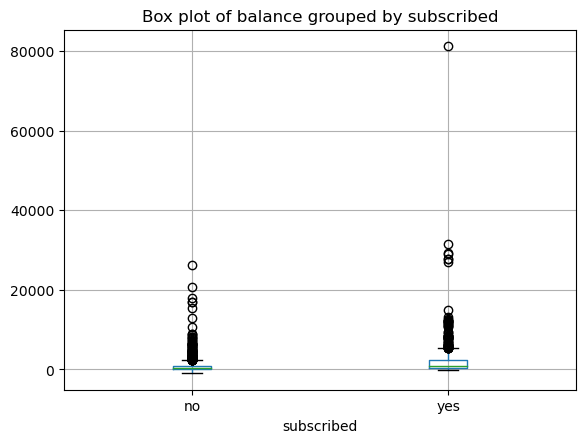

In [14]:
df.boxplot(column='balance', by='subscribed')
plt.title('Box plot of balance grouped by subscribed')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

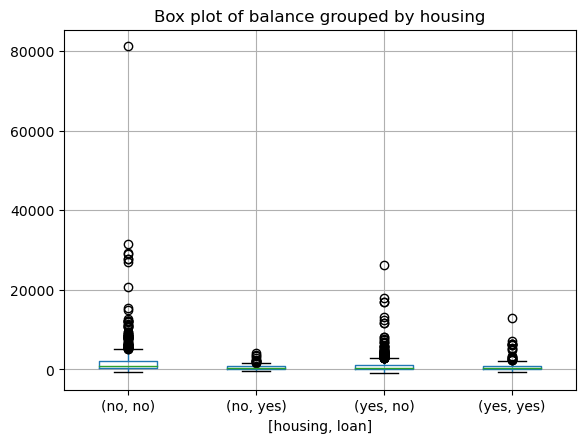

In [15]:
df.boxplot(column='balance', by=['housing','loan'])
plt.title('Box plot of balance grouped by housing')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

The average account balance of people without any loans is significantly higher than the average account balance of people with loans.
So we can infer that people who are under loan pressure have a small balance in their account because they use it to repay the loan (loan & housing) every month.
If the balance in the account is insufficient, it is naturally impossible to participate in the bank's fixed deposit activities. Then we can make a bold guess whether to subscribe to the bank's deposit activities is related to the loan pressure.

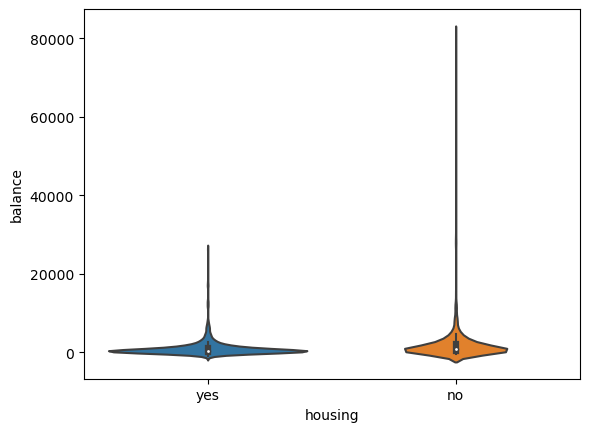

In [16]:
sns.violinplot(data=df, x='housing', y='balance')
plt.show()

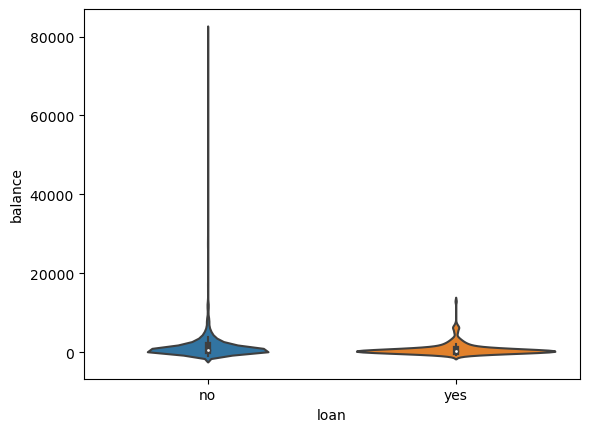

In [17]:
sns.violinplot(data=df, x='loan', y='balance')
plt.show()

In order to further prove our conclusion, we use the following method to prove:

### E. Distribution Analysis for Categorical Attributes

In [18]:
# frequency_table = df.l['housing'].value_counts(ascending=True)

df["loan&housing"] = df['loan']+","+df["housing"]
frequency_table = df["loan&housing"].value_counts(ascending=True)
print(frequency_table)

yes,no      80
yes,yes    170
no,yes     793
no,no      957
Name: loan&housing, dtype: int64


In [19]:
# frequency_table = df['loan'].value_counts(ascending=True)
# print('Frequency Table for loan:') 
# print(frequency_table)

In [20]:
pivot_table_LC = df.pivot_table(values='subscribed',
                                index=['loan','housing'],
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

In [21]:
# Print pivot table
print(pivot_table_LC)

              subscribed
loan housing            
no   no         0.805643
     yes        0.234552
yes  no         0.325000
     yes        0.100000


This is the calculated probability between subscribing and loan&housing. The probability for subscribed without loan and housingloan is 0.805643(80.6%), for subscribed without loan but housingloan is 0.234552(23.5%), for subscribed without housingloan but loan is 0.325000(32.5%), and for subscribed with loan and housingloan is just 0.1000000(10%).

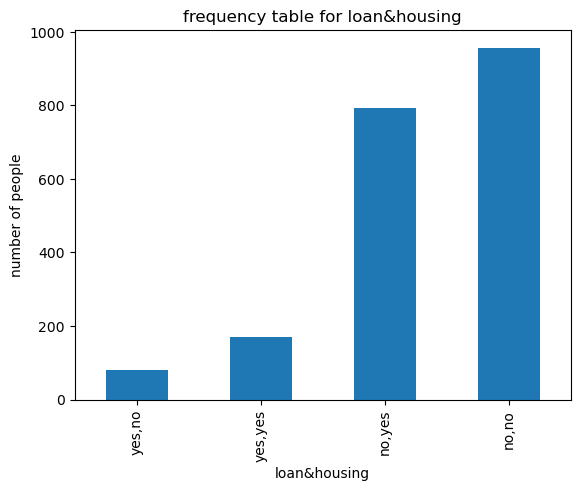

In [22]:
# Plot the frequency table
frequency_table.plot(kind='bar')
plt.xlabel('loan&housing')
plt.ylabel('number of people')
plt.title('frequency table for loan&housing')
plt.show()

In [23]:
frequency_table.plot

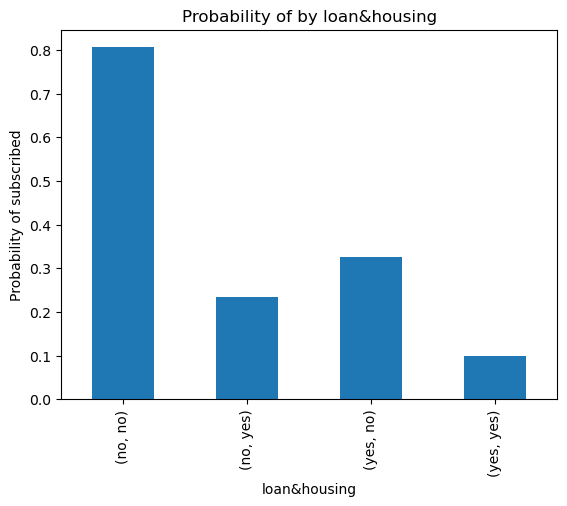

In [24]:
# Plot pivot table
pivot_table_LC.plot(kind='bar')
plt.xlabel('loan&housing')
plt.ylabel('Probability of subscribed')
plt.title('Probability of by loan&housing')
plt.legend().set_visible(False) # we don't need the default legend

From this probability table, we can confirm our conclusion: whether to subscribe to the bank's time deposit is related to whether there is loan pressure.
If there is a loan, it is natural to repay the loan, and there is not much balance in the bank account to subscribe to the bank's fixed deposit activities.